# Setup enviorment

In [11]:
# Data reading in Dataframe format and data preprocessing
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from pandas import concat

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Linear algebra operations
import numpy as np

# Epiweek
from epiweeks import Week, Year

In [12]:
import warnings
warnings.filterwarnings('ignore')

# Read dataset

In [31]:
dengue_cases = pd.read_csv('../Dengue_dataset/cases_per_inhabitants.csv')
names = dengue_cases[dengue_cases.columns[:2]]
cases = dengue_cases[dengue_cases.columns[2:]]
cases.columns = cases.columns.to_series().apply(lambda x: int(x))

# Merge:
dengue_cases = pd.concat([names, cases], axis=1)

dengue_cases

,Municipality code,Municipality,200701,200702,200703,200704,200705,200706,200707,200708,...,201943,201944,201945,201946,201947,201948,201949,201950,201951,201952
0,5001,Medellín,4.374212e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000012,0.000007,0.000014,0.000006,0.000008,0.000006,0.000008,0.000012,0.000006,0.000002
1,5002,Abejorral,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,5004,Abriaquí,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,5021,Alejandría,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,5030,Amagá,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000032,0.000032,0.000032,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,97889,Yavaraté,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1117,99001,Puerto Carreño,0.000000e+00,0.000073,0.000073,0.000146,0.000146,0.000073,0.0,0.0,...,0.000000,0.000049,0.000098,0.000049,0.000049,0.000000,0.000000,0.000000,0.000049,0.000000
1118,99524,La Primavera,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000102,0.000102,0.000102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1119,99624,Santa Rosalía,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [32]:
def get_mean_by_municipality(df):
    
    dengue_epiweeks = df.columns[2:]
    names = ['Municipality code', 'Municipality']

    df['Mean_by_Municipality'] = df[dengue_epiweeks].sum(axis=1)/len(dengue_epiweeks)
    total_c = df[names + ['Mean_by_Municipality']]
    
    df.drop(columns=['Mean_by_Municipality'], inplace=True)
    
    mean = total_c.mean()['Mean_by_Municipality']
    
    return total_c, mean

In [33]:
mean_cases, mean = get_mean_by_municipality(dengue_cases)

In [34]:
def filter_df(df, municipality):
    df = df[df.Municipality == municipality]
    df = df.iloc[:,2:]
    return df.T

In [132]:
""" 
Function to plot the time series
"""
def plot_cases(df, municipalities, mean):
    
    plt.figure(figsize = (14, 8))
    
    for municipality in municipalities:
        df_aux = filter_df(df, municipality)
        plt.plot(df_aux.index, df_aux.values, label=municipality)
        
    if mean:
        plt.axhline(mean, color='r', label='mean in colombia')
        plt.axhspan(mean, 0, facecolor='r', alpha=0.5)
    
    plt.xlabel('Date') 
    plt.ylabel('Dengue Cases')
    plt.title('Dengue Cases')
    
    plt.legend()
    plt.show()

### Overall

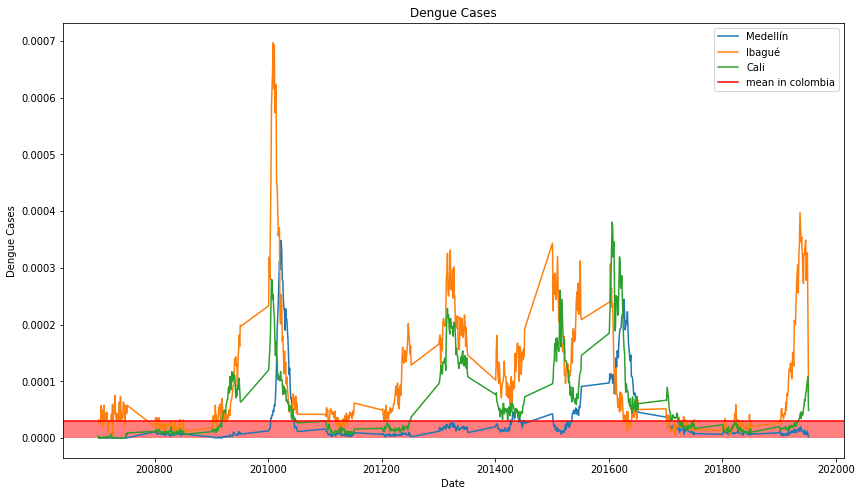

In [133]:
municipalities = ['Medellín', 'Ibagué', 'Cali']
plot_cases(dengue_cases, municipalities, mean)

### Per Municipality

In [68]:
""" 
Function to plot the time series
"""
def plot_cases_municipality(df, municipality, mean_df):
    
    plt.figure(figsize = (10, 6))

    df_aux = filter_df(df, municipality)
    plt.plot(df_aux.index, df_aux.iloc[:,0], label=municipality)
    
    df_aux = filter_df(mean_df, municipality)
    
    plt.axhline(df_aux.values, color='r', label='mean in colombia')
    plt.axhspan(df_aux.values, 0, facecolor='r', alpha=0.5)
    
    plt.xlabel('Date') 
    plt.ylabel('Dengue Cases')
    plt.title('Dengue Cases')
    
    plt.legend()
    plt.show()

In [69]:
"""
Function to show histograms of 3 municipalities

1. You must pass the list of the names of the 3 municipalities as they appear in the dataset
Example:
-> Medellín
-> Cali
-> Popayán

2. With those names you form a list like this:
-> municipalities = ['Medellín', 'Cali', 'Popayán']

3. You call the function like this:
where df is the dataframe with the data
-> plot_histogram(df, municipalities)

Optional:
you can change the color by putting a color between the parentheses, like this:
-> plot_histogram(df, municipalities, color='#fcba03')

In this case the color is '#fcba03', but you can also use the name, like:
-> plot_histogram(df, municipalities, color='Blue')
"""

def plot_cases_more_cities(df, mean_df, municipalities, color='#fcba03'):

    plt.gcf().set_size_inches(15, 8)
    for municipality in municipalities:

        plot_cases_municipality(df, municipality, mean_df)
        
    plt.show()

<Figure size 1080x576 with 0 Axes>

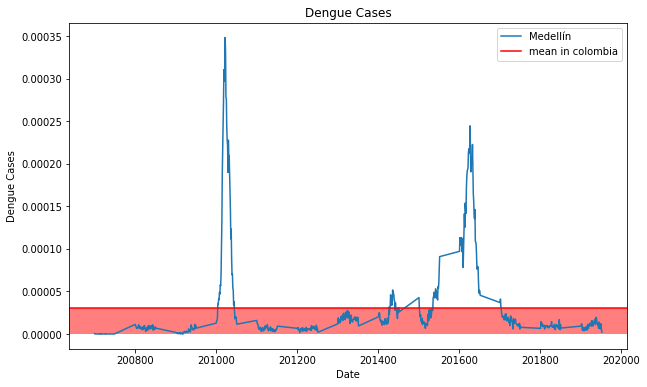

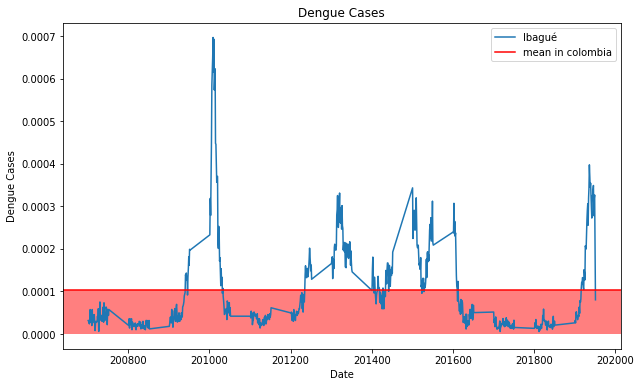

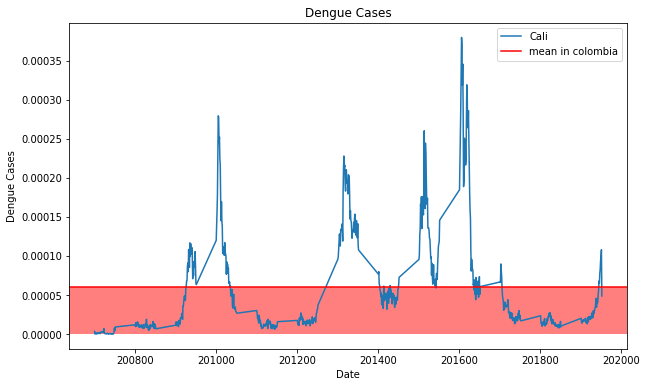

In [70]:
municipalities = ['Medellín', 'Ibagué', 'Cali']
plot_cases_more_cities(dengue_cases, mean_cases, municipalities, color='#fcba03')

# Generate classes

In [124]:
def generate_classes(cases, means):
    names = ['Municipality code', 'Municipality']
    cases_names = cases.columns[2:]
    columns = cases.columns
    
    total = cases.merge(means, on=names, how='inner')
    
    for column in cases_names:
        cols = [column, 'Mean_by_Municipality']
        total[column] = total.apply(lambda x: 1 if x[column] > x['Mean_by_Municipality'] else 0, axis=1)

    total.drop(columns=['Mean_by_Municipality'], inplace=True)
    return total

In [126]:
cases_classes = generate_classes(dengue_cases, mean_cases)
cases_classes

,Municipality code,Municipality,200701,200702,200703,200704,200705,200706,200707,200708,...,201943,201944,201945,201946,201947,201948,201949,201950,201951,201952
0,5001,Medellín,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5002,Abejorral,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5004,Abriaquí,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5021,Alejandría,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5030,Amagá,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,97889,Yavaraté,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1117,99001,Puerto Carreño,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1118,99524,La Primavera,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
1119,99624,Santa Rosalía,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
cases_classes.to_csv('cases_classes.csv', index=False)

In [130]:
pd.read_csv('../Dengue_dataset/cases_classes.csv')

,Municipality code,Municipality,200701,200702,200703,200704,200705,200706,200707,200708,...,201943,201944,201945,201946,201947,201948,201949,201950,201951,201952
0,5001,Medellín,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5002,Abejorral,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5004,Abriaquí,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5021,Alejandría,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5030,Amagá,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,97889,Yavaraté,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1117,99001,Puerto Carreño,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1118,99524,La Primavera,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
1119,99624,Santa Rosalía,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


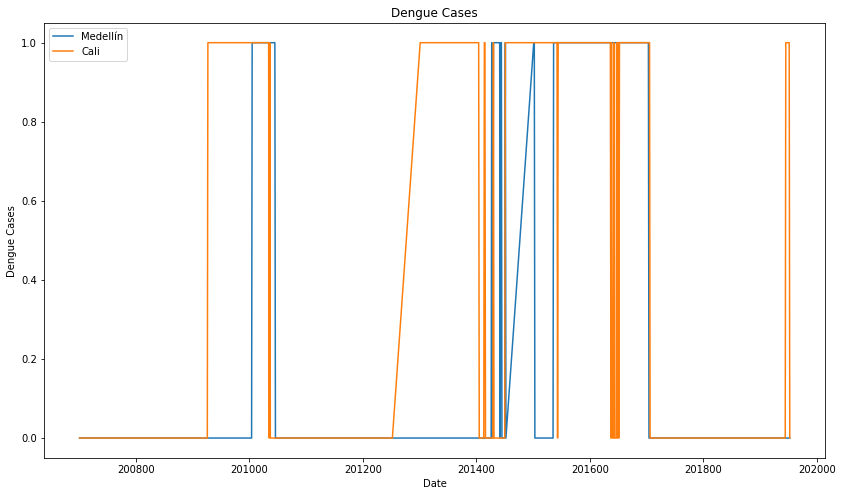

In [137]:
municipalities = ['Medellín', 'Cali']
plot_cases(cases_classes, municipalities, None)